In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)

In [227]:
# Trabajaremos con 3 archivos csv, los leemos y guardamos en variables
df = pd.read_csv('data/raw//Energy data 1990 - 2020.csv', encoding='latin1')
df1 = pd.read_csv ('data/raw/share-elec-produc-by-source.csv')

In [228]:
df.head(2)

,ï»¿country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,8.08,25.395,45.68403547,14.301991,0.095856,17.242,13.693,0.94,0,57.850,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,8.45,25.435,49.53198889,15.312995,0.102625,18.535,14.058,1.171,0,57.076,0


In [229]:
df1.head(2)

,Entity,Code,Year,Coal (% electricity),Gas (% electricity),Hydro (% electricity),Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity)
0,Afghanistan,AFG,2000,0.0,33.190578,66.809422,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,15.878378,84.121622,0.0,0.0,0.0,0.0,0.0


## LIMPIEZA
1. Datos faltantes en celdas
2. Columnas irrelevantes 
3. Registro de filas repetidas
4. Valores Extremos - 'outliers' para variables numericas
5. Errores tipograficos para variables categoricas
 

# --------------------------------------------------------------------------

#### 1. Datos faltantes

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 21 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Country                                                                   1364 non-null   object 
 1   Year                                                                      1364 non-null   int64  
 2   Region                                                                    1364 non-null   object 
 3   CO2 emissions from fuel combustion (MtCO2)                                1364 non-null   float64
 4   Average CO2 emission factor (tCO2/toe)                                    1364 non-null   float64
 5   CO2 intensity at constant purchasing power parities (kCO2/$15p)           1364 non-null   float64
 6   Total energy production (Mtoe)                                  

A primera vista podemos observar que no hay datos faltantes, todas las variables tienen un total de 1364 filas. 

In [271]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6190 entries, 0 to 6189
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           6190 non-null   object 
 1   Year                              6190 non-null   int64  
 2   Coal (% electricity)              5170 non-null   float64
 3   Gas (% electricity)               5170 non-null   float64
 4   Hydro (% electricity)             6190 non-null   float64
 5   Solar (% electricity)             6190 non-null   float64
 6   Wind (% electricity)              6190 non-null   float64
 7   Oil (% electricity)               5170 non-null   float64
 8   Nuclear (% electricity)           6190 non-null   float64
 9   Other renewables (% electricity)  6155 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 483.7+ KB


In [272]:
# df : porcentaje de nulos
a = df.isna().sum()/len(df)*100
a.sort_values(ascending=False).head(10)

Country                                                                     0.0
Refined oil products production (Mt)                                        0.0
Crude oil production (Mt)                                                   0.0
Share of wind and solar in electricity production (%)                       0.0
Coal and lignite domestic consumption (Mt)                                  0.0
Electricity domestic consumption (TWh)                                      0.0
Electricity production (TWh)                                                0.0
Energy intensity of GDP at constant purchasing power parities (koe/$15p)    0.0
Natural gas domestic consumption (bcm)                                      0.0
Natural gas production (bcm)                                                0.0
dtype: float64

In [275]:
"""
df:
Las columnas a las que vamos a cambiar el Tipo de Dato en este apartado, aparecian como object pese a ser numericas, debido a que poseian 
valores 'n.a.', lo que impedia su conversion.

Reemplazaremos 'n.a.' por cero, esto debido a que en los paises donde aparece este valor ('n.a.'), la produccion o consumo del
producto que describe la variable es cero.

"""
df['Natural gas production (bcm)'].replace('n.a.', 0, inplace=True)
df['Coal and lignite domestic consumption (Mt)'].replace('n.a.', 0, inplace=True)
df['Share of wind and solar in electricity production (%)'].replace('n.a.', 0, inplace=True)
df['Coal and lignite production (Mt)'].replace('n.a.', 0, inplace=True)

"""
Para el dataframe df1 no es necesario hacer el cambio de tipo de variable.
"""

'\nPara el dataframe df1 no es necesario hacer el cambio de tipo de variable.\n'

In [276]:
"""
df:
Procedemos a realizar el cambio de tipo de dato de las variables de este dataframe.
"""
df['Natural gas production (bcm)'] = df['Natural gas production (bcm)'].astype('float64')
df['Coal and lignite domestic consumption (Mt)'] = df['Coal and lignite domestic consumption (Mt)'].astype('float64')
df['Share of wind and solar in electricity production (%)'] = df['Share of wind and solar in electricity production (%)'].astype('float64')
df['Coal and lignite production (Mt)'] = df['Coal and lignite production (Mt)'].astype('float64')
df.dtypes

Country                                                                      object
Year                                                                          int64
Region                                                                       object
CO2 emissions from fuel combustion (MtCO2)                                  float64
Average CO2 emission factor (tCO2/toe)                                      float64
CO2 intensity at constant purchasing power parities (kCO2/$15p)             float64
Total energy production (Mtoe)                                              float64
Total energy consumption (Mtoe)                                             float64
Share of renewables in electricity production (%)                           float64
Share of electricity in total final energy consumption (%)                  float64
Oil products domestic consumption (Mt)                                      float64
Refined oil products production (Mt)                                        

In [277]:
# df1 : porcentaje de nulos
b = df1.isna().sum()/len(df1)*100
b.sort_values(ascending=False).head(10)

Coal (% electricity)                16.478191
Gas (% electricity)                 16.478191
Oil (% electricity)                 16.478191
Other renewables (% electricity)     0.565428
Country                              0.000000
Year                                 0.000000
Hydro (% electricity)                0.000000
Solar (% electricity)                0.000000
Wind (% electricity)                 0.000000
Nuclear (% electricity)              0.000000
dtype: float64

In [278]:
"""
df1:
Reemplazaremos 'n.a.' por cero, esto debido a que en los paises donde aparece este valor ('n.a.'), el uso de este combustible (variable) 
para generar energia electrica en estos lugares es nulo.

"""
df1['Coal (% electricity)'].replace('n.a.', 0, inplace=True)
df1['Gas (% electricity)'].replace('n.a.', 0, inplace=True)
df1['Oil (% electricity)'].replace('n.a.', 0, inplace=True)

#### 2. Columnas irrelevantes

* Con informacion que no se enfoque en el problema que pretendemos resolver
* Columnas categoricas que solo posean un solo dato
* Columnas numericas que tengan un unico valor
* Columna con informacion redundante, ejemplo: pais: 'España' Cod: 'Esp'

In [279]:
"""
df:
Realizamos el cambio de nombre de una de las variables, suponemos que hay un error caligrafico  
"""
df.rename(columns={'ï»¿country':'Country'}, inplace=True)

In [301]:
"""
df:
A primera vista eliminaremos la columna 'Code' la cual representa una abreviatura de cada uno de los elementos de la columna 'Entity' 
"""
df = df.drop(columns=['Region', 'CO2 intensity at constant purchasing power parities (kCO2/$15p)', 'Refined oil products production (Mt)',
                      'Energy intensity of GDP at constant purchasing power parities (koe/$15p)'])

In [ ]:
"""
df1:
A primera vista eliminaremos la columna 'Code' la cual representa una abreviatura de cada uno de los elementos de la columna 'Entity' 
"""
df1 = df1.drop(columns=['Code'])

In [304]:
# Hacemos cambios en los nombres de las columnas que contienen los nombres de los paises, para los dos dataframes las llamaremos 'Country'
df1.rename(columns={'Entity': 'Country'}, inplace=True)

Como todas las columnas categoricas no contienen datos unicos, NO eliminamos ninguna de ellas.

In [284]:
# df: Analicemos ahora las columnas numericas
df.describe()

,Year,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,2005.000000,550.375178,2.238542,0.339275,229.826912,225.967632,24.076995,17.622567,68.848847,76.888589,58.483769,59.809200,0.148322,388.581268,334.988933,131.105880,2.484005,74.128901,132.116314
std,8.947552,1213.057599,0.560594,0.246502,400.993541,445.242818,25.490850,7.296381,128.339745,134.644907,131.115993,117.396106,0.090503,834.834194,732.822644,421.713232,4.966028,119.664826,411.988597
min,1990.000000,7.597759,0.412331,0.063650,2.939712,2.622633,0.000000,0.937144,1.949000,0.013357,0.000000,0.000000,0.051662,10.780000,7.871000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,99.947198,2.021666,0.194481,34.720989,46.632538,6.097708,13.259106,12.809000,15.883000,2.394750,10.650942,0.094997,70.020000,55.962250,2.885500,0.001706,1.599250,0.148500
50%,2005.000000,221.036281,2.339406,0.255510,102.602180,93.825969,14.871924,16.869971,27.752179,37.011757,19.859993,28.045997,0.121372,146.845534,123.632788,21.457516,0.136850,25.896500,4.824937
75%,2013.000000,423.833152,2.521811,0.421460,217.237230,195.807818,33.281413,21.392581,77.500856,85.048250,52.452236,53.495693,0.176885,308.447191,287.612059,79.853024,2.678928,106.382250,72.811000
max,2020.000000,9716.772478,3.516984,1.820894,2749.046580,3381.399262,99.817877,50.011500,888.491000,908.397596,959.849849,882.637083,0.775061,7797.561415,6752.147800,3970.175482,32.093219,748.192443,3748.530000


In [285]:
# df1: Analicemos ahora las columnas numericas
df1.describe()

,Year,Coal (% electricity),Gas (% electricity),Hydro (% electricity),Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity)
count,6190.000000,5170.000000,5170.000000,6190.000000,6190.000000,6190.000000,5170.000000,6190.000000,6155.000000
mean,2005.501131,17.431687,23.251049,26.213096,0.406232,1.308663,34.659474,5.248678,1.969872
std,9.321596,39.898895,37.708235,30.950684,1.456500,5.890959,40.407903,13.252240,4.691999
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,0.000000,0.000000,0.145994,0.000000,0.000000,1.680045,0.000000,0.000000
50%,2007.000000,0.000000,8.004601,12.178127,0.000000,0.000000,12.568226,0.000000,0.065476
75%,2013.000000,24.295534,32.603113,47.546039,0.057878,0.139802,68.453354,0.000000,1.558274
max,2020.000000,523.074933,310.456745,100.000000,25.711136,100.000000,267.854610,86.919532,49.047163


Como todas las columnas numericas tienen una desviacion estandar diferente de cero, lo que indica que no tienen un unico dato numerico, NO eliminamos ninguna de ellas.

#### 3. Registro de filas repetidas

In [307]:
#df: Filas repetidas

print (f'Tamaño del dataSet antes de elimiar filas: {df.shape}')
df.drop_duplicates (inplace=True)
print (f'Tamaño del dataSet despues de elimiar filas: {df.shape}')

Tamaño del dataSet antes de elimiar filas: (1364, 17)
Tamaño del dataSet despues de elimiar filas: (1364, 17)


In [308]:
#df1: Filas repetidas

print (f'Tamaño del dataSet antes de elimiar filas: {df1.shape}')
df.drop_duplicates (inplace=True)
print (f'Tamaño del dataSet despues de elimiar filas: {df1.shape}')

Tamaño del dataSet antes de elimiar filas: (6190, 10)
Tamaño del dataSet despues de elimiar filas: (6190, 10)


Se evidencia que no hay filas repetidas, por lo que el DataSet se mantiene

In [309]:
df.columns

Index(['Country', 'Year', 'CO2 emissions from fuel combustion (MtCO2)',
       'Average CO2 emission factor (tCO2/toe)',
       'Total energy production (Mtoe)', 'Total energy consumption (Mtoe)',
       'Share of renewables in electricity production (%)',
       'Share of electricity in total final energy consumption (%)',
       'Oil products domestic consumption (Mt)',
       'Natural gas production (bcm)',
       'Natural gas domestic consumption (bcm)',
       'Electricity production (TWh)',
       'Electricity domestic consumption (TWh)',
       'Coal and lignite domestic consumption (Mt)',
       'Share of wind and solar in electricity production (%)',
       'Crude oil production (Mt)', 'Coal and lignite production (Mt)'],
      dtype='object')

In [311]:
df1.columns

Index(['Country', 'Year', 'Coal (% electricity)', 'Gas (% electricity)',
       'Hydro (% electricity)', 'Solar (% electricity)',
       'Wind (% electricity)', 'Oil (% electricity)',
       'Nuclear (% electricity)', 'Other renewables (% electricity)'],
      dtype='object')

In [312]:
# Hacemos la union de los dos datasets
df_merg = pd.merge(df1, df, on='Country', how='inner')
df_merg.head()


,Country,Year_x,Coal (% electricity),Gas (% electricity),Hydro (% electricity),Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity),Year_y,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,2000,0.0,99.778145,0.221855,0.0,0.0,0.0,0.0,0.0,1990,52.981921,2.387855,100.112749,22.188078,0.782972,8.376592,8.080,45.684035,14.301991,17.242,13.693,0.940,0.0,57.850,0.0
1,Algeria,2000,0.0,99.778145,0.221855,0.0,0.0,0.0,0.0,0.0,1991,57.149971,2.435026,102.586171,23.469959,1.580793,7.994748,8.450,49.531989,15.312995,18.535,14.058,1.171,0.0,57.076,0.0
2,Algeria,2000,0.0,99.778145,0.221855,0.0,0.0,0.0,0.0,0.0,1992,57.262430,2.383517,104.205908,24.024343,1.022926,8.490068,8.349,51.670011,15.727010,19.454,15.130,1.056,0.0,56.904,0.0
3,Algeria,2000,0.0,99.778145,0.221855,0.0,0.0,0.0,0.0,0.0,1993,59.198702,2.455335,104.928745,24.110238,1.709195,8.291029,8.390,52.385991,16.596984,20.653,15.144,1.015,0.0,56.995,0.0
4,Algeria,2000,0.0,99.778145,0.221855,0.0,0.0,0.0,0.0,0.0,1994,56.347927,2.424649,100.612596,23.239627,0.783869,9.170605,7.562,48.206020,16.117004,21.177,15.545,0.943,0.0,56.312,0.0


In [313]:
df_merg.shape

(48360, 26)

In [314]:
# df_merg : porcentaje de nulos
c = df_merg.isna().sum()/len(df_merg)*100
c.sort_values(ascending=False).head(10)

Coal (% electricity)                                     13.461538
Gas (% electricity)                                      13.461538
Oil (% electricity)                                      13.461538
Country                                                   0.000000
Share of renewables in electricity production (%)         0.000000
Crude oil production (Mt)                                 0.000000
Share of wind and solar in electricity production (%)     0.000000
Coal and lignite domestic consumption (Mt)                0.000000
Electricity domestic consumption (TWh)                    0.000000
Electricity production (TWh)                              0.000000
dtype: float64

In [ ]:
df.groupby()

In [293]:
print (f'Tamaño del dataSet antes de elimiar filas: {df_merg.shape}')
df_merg.drop_duplicates (inplace=True)
print (f'Tamaño del dataSet despues de elimiar filas: {df_merg.shape}')

Tamaño del dataSet antes de elimiar filas: (48360, 30)
Tamaño del dataSet despues de elimiar filas: (48360, 30)


In [297]:
df_merg

,Country,Year_x,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt),Year_y,Coal (% electricity),Gas (% electricity),Hydro (% electricity),Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,8.080000,25.395000,45.684035,14.301991,0.095856,17.242000,13.693000,0.940000,0.000000,57.850000,0.000000,2000,0.0,99.778145,0.221855,0.0,0.0,0.0,0.0,0.0
1,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,8.080000,25.395000,45.684035,14.301991,0.095856,17.242000,13.693000,0.940000,0.000000,57.850000,0.000000,2001,0.0,99.728333,0.271667,0.0,0.0,0.0,0.0,0.0
2,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,8.080000,25.395000,45.684035,14.301991,0.095856,17.242000,13.693000,0.940000,0.000000,57.850000,0.000000,2002,0.0,99.784545,0.215455,0.0,0.0,0.0,0.0,0.0
3,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,8.080000,25.395000,45.684035,14.301991,0.095856,17.242000,13.693000,0.940000,0.000000,57.850000,0.000000,2003,0.0,99.057881,0.942119,0.0,0.0,0.0,0.0,0.0
4,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,8.080000,25.395000,45.684035,14.301991,0.095856,17.242000,13.693000,0.940000,0.000000,57.850000,0.000000,2004,0.0,99.156091,0.843909,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48355,Venezuela,2020,South/Latin America,85.048356,2.916478,0.601990,51.397630,29.161319,60.944184,23.787544,17.910153,25.405931,14.621589,17.813666,0.206410,92.816467,61.944911,0.019346,0.076846,32.229088,0.195767,1995,NaN,NaN,70.051466,0.0,0.0,NaN,0.0,0.0
48356,Venezuela,2020,South/Latin America,85.048356,2.916478,0.601990,51.397630,29.161319,60.944184,23.787544,17.910153,25.405931,14.621589,17.813666,0.206410,92.816467,61.944911,0.019346,0.076846,32.229088,0.195767,1996,NaN,NaN,71.237498,0.0,0.0,NaN,0.0,0.0
48357,Venezuela,2020,South/Latin America,85.048356,2.916478,0.601990,51.397630,29.161319,60.944184,23.787544,17.910153,25.405931,14.621589,17.813666,0.206410,92.816467,61.944911,0.019346,0.076846,32.229088,0.195767,1997,NaN,NaN,73.358440,0.0,0.0,NaN,0.0,0.0
48358,Venezuela,2020,South/Latin America,85.048356,2.916478,0.601990,51.397630,29.161319,60.944184,23.787544,17.910153,25.405931,14.621589,17.813666,0.206410,92.816467,61.944911,0.019346,0.076846,32.229088,0.195767,1998,NaN,NaN,71.594730,0.0,0.0,NaN,0.0,0.0


In [262]:
a = df_merg.isna().sum()/len(df_merg)*100
a.sort_values(ascending=False).head(10)

Oil (% electricity)        13.461538
Gas (% electricity)        13.461538
Coal (% electricity)       13.461538
Country                     0.000000
Year_x                      0.000000
Nuclear (% electricity)     0.000000
Wind (% electricity)        0.000000
Solar (% electricity)       0.000000
Hydro (% electricity)       0.000000
Year_y                      0.000000
dtype: float64

In [324]:
cardi = pd.DataFrame(columns =['cardinalidad', 'porc_cardi', 'tipo_dato', 'val_unicos', 'tipo_variable'], index= df_merg.columns)
cardi['cardinalidad'] = [df_merg[col].nunique() for col in df_merg.columns]
cardi['porc_cardi'] = cardi['cardinalidad']/len(df_merg)*100
cardi['tipo_dato'] = df_merg.dtypes
cardi['val_unicos'] = [df_merg[col].nunique() if df_merg[col].nunique()<=15 else 'VNR' for col in df_merg.columns]
cardi

,cardinalidad,porc_cardi,tipo_dato,val_unicos,tipo_variable
Country,44,0.090984,object,VNR,NaN
Year_x,36,0.074442,int64,VNR,NaN
Coal (% electricity),1141,2.359388,float64,VNR,NaN
Gas (% electricity),1314,2.717122,float64,VNR,NaN
Hydro (% electricity),1456,3.010753,float64,VNR,NaN
Solar (% electricity),837,1.730769,float64,VNR,NaN
Wind (% electricity),984,2.034739,float64,VNR,NaN
Oil (% electricity),1227,2.537221,float64,VNR,NaN
Nuclear (% electricity),791,1.635649,float64,VNR,NaN
Other renewables (% electricity),1176,2.431762,float64,VNR,NaN


#### 4. Valores Extremos - 'outliers' - para variables numericas

ValueError: Could not interpret value `CO2 intensity at constant purchasing power parities (kCO2/$15p)` for `x`. An entry with this name does not appear in `data`.

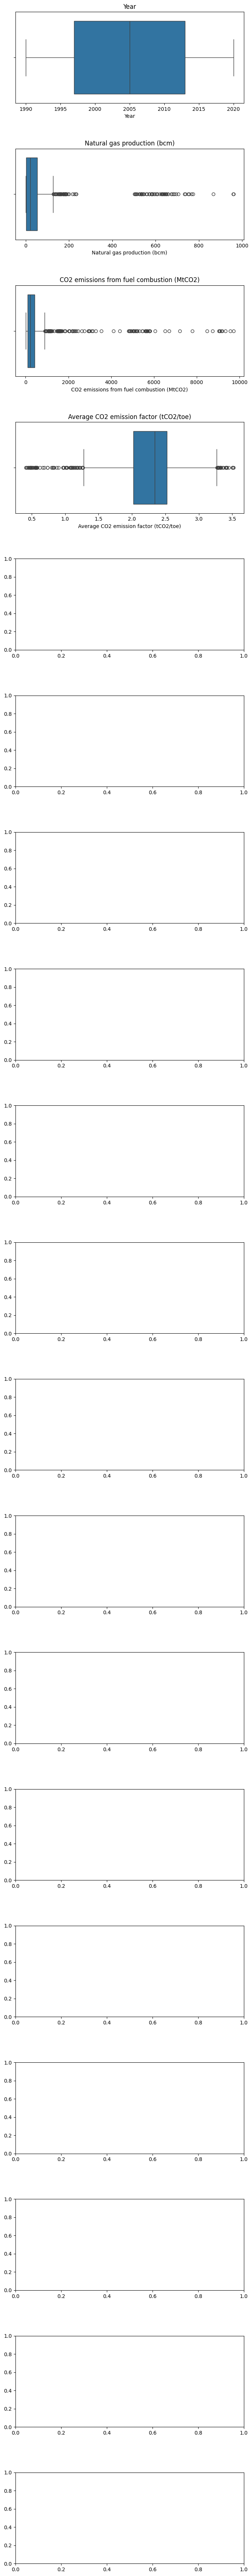

In [325]:
# Graficaremos las variables numericas de manera individual

columnas_numer = ['Year', 'Natural gas production (bcm)','CO2 emissions from fuel combustion (MtCO2)', 'Average CO2 emission factor (tCO2/toe)', 
                'CO2 intensity at constant purchasing power parities (kCO2/$15p)', 'Total energy production (Mtoe)', 
                'Total energy consumption (Mtoe)', 'Share of renewables in electricity production (%)', 'Coal and lignite domestic consumption (Mt)',
                'Share of electricity in total final energy consumption (%)', 'Oil products domestic consumption (Mt)', 
                'Refined oil products production (Mt)', 'Share of wind and solar in electricity production (%)','Natural gas domestic consumption (bcm)', 
                'Energy intensity of GDP at constant purchasing power parities (koe/$15p)', 'Electricity production (TWh)', 
                'Electricity domestic consumption (TWh)', 'Coal and lignite production (Mt)', 'Crude oil production (Mt)']

fig, ax = plt.subplots(nrows = 19, ncols = 1, figsize = (8, 90))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_numer):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

#### 5. Errores tipograficos para variables categoricas

C:\Users\Sandia\AppData\Local\Temp\ipykernel_15748\1627490456.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Sandia\AppData\Local\Temp\ipykernel_15748\1627490456.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


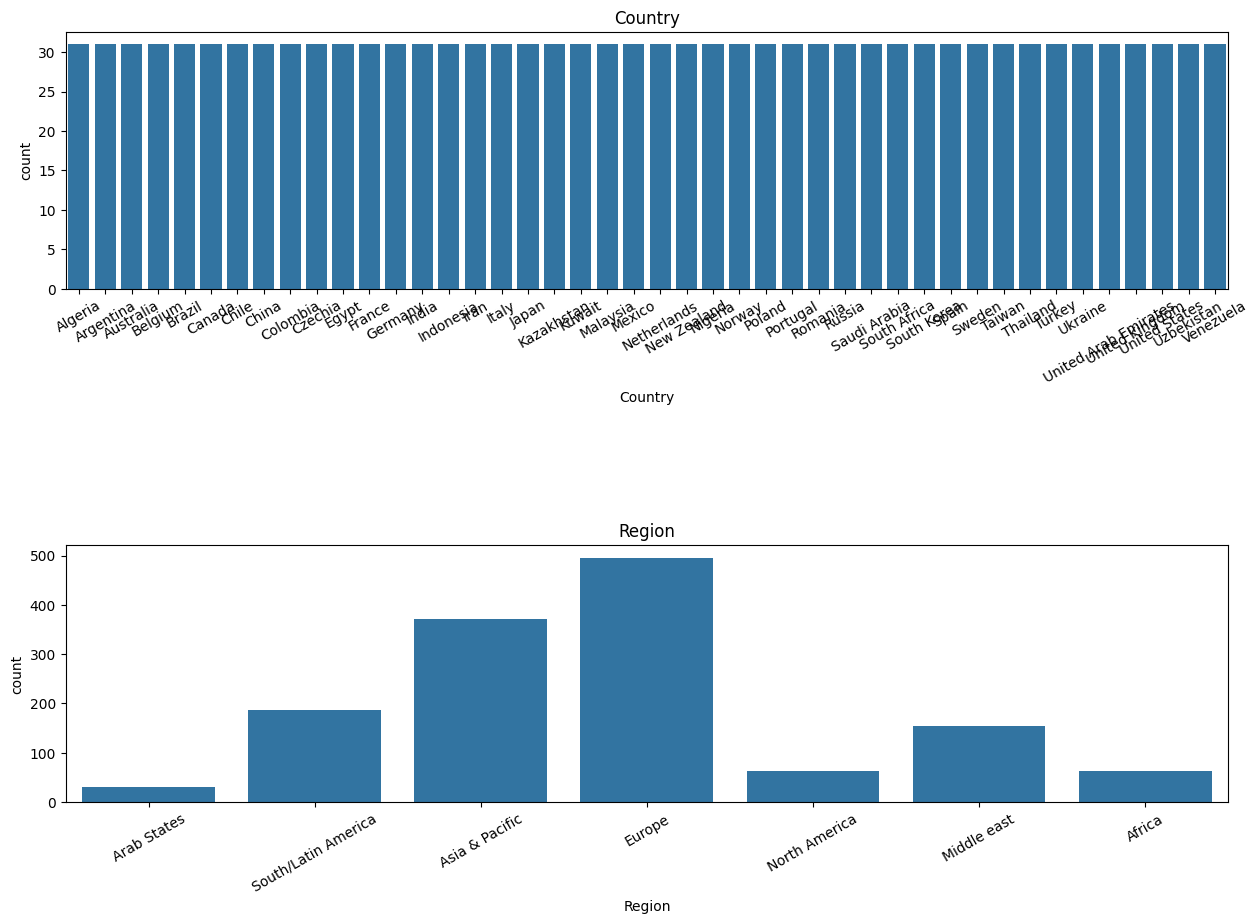

In [85]:
columnas_cat = ['Country', 'Region']

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columnas_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

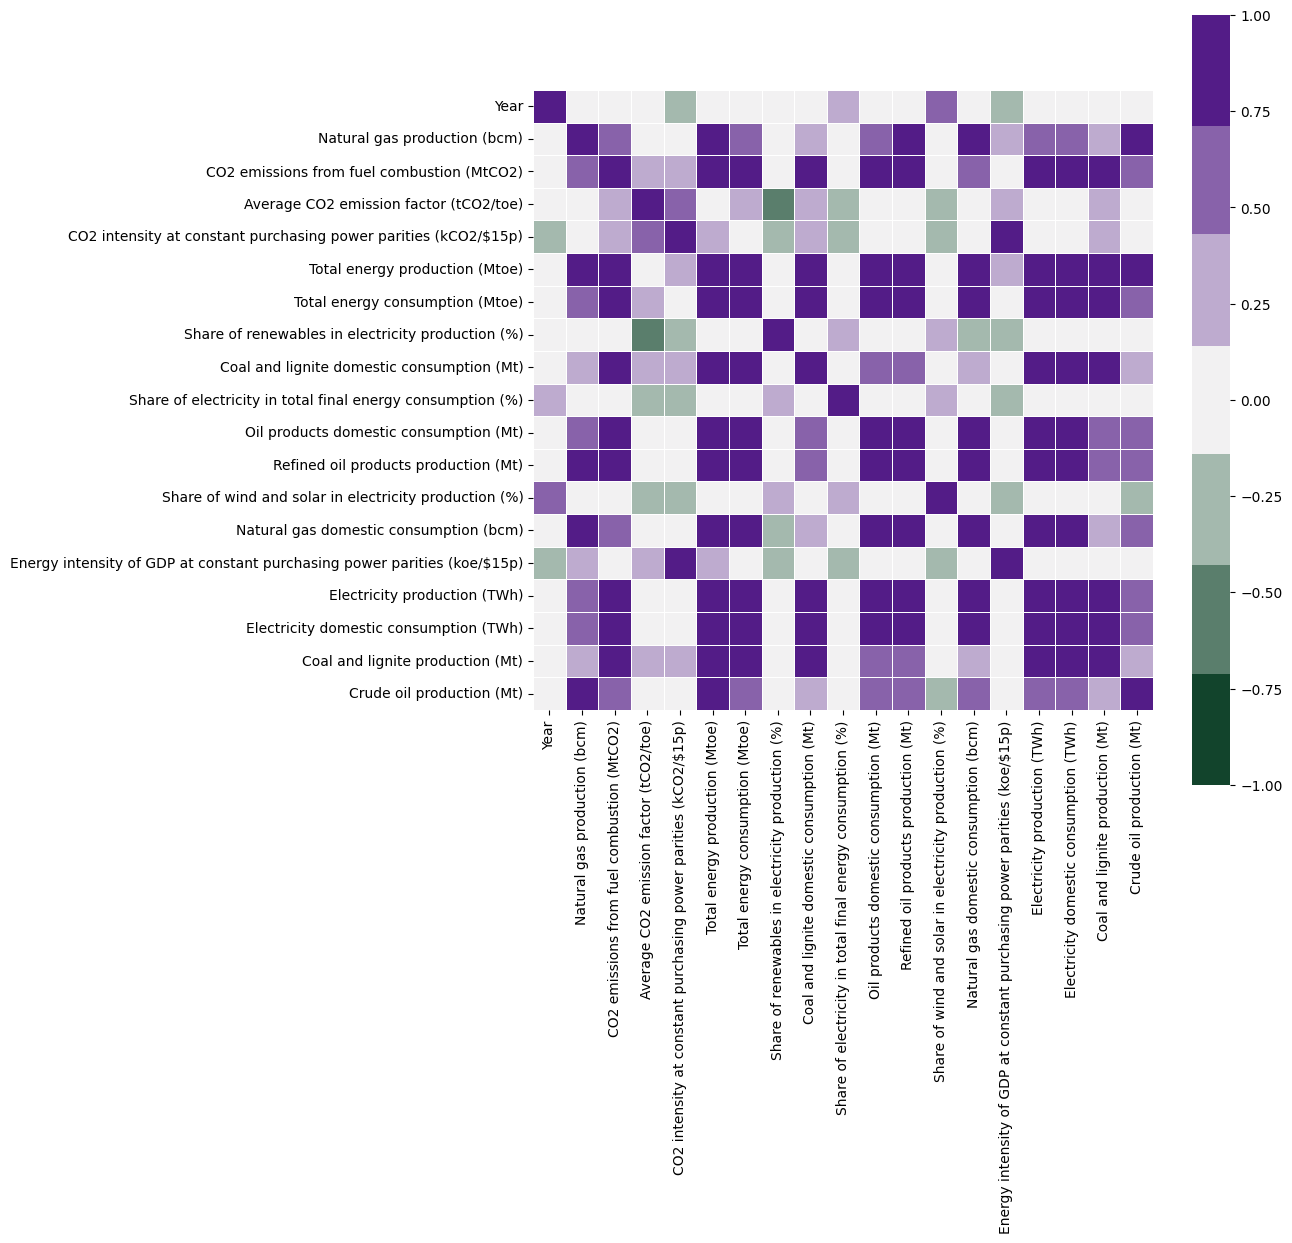

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(df[columnas_numer].corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5);

In [86]:
df

,Country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,8.080000,25.395000,45.68403547,14.301991,0.095856,17.242000,13.693000,0.94,0,57.850000,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,8.450000,25.435000,49.53198889,15.312995,0.102625,18.535000,14.058000,1.171,0,57.076000,0
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,8.349000,25.459000,51.67001137,15.727010,0.103192,19.454000,15.130000,1.056,0,56.904000,0
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,8.390000,25.463000,52.38599054,16.596984,0.105782,20.653000,15.144000,1.015,0,56.995000,0
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,7.562000,23.971000,48.20601995,16.117004,0.102888,21.177000,15.545000,0.943,0,56.312000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,Venezuela,2016,South/Latin America,130.244135,2.214743,0.304632,169.124743,58.807791,58.377863,19.308332,27.675000,42.060000,24.47599903,22.692979,0.137547,107.981000,73.420000,0.202,0.07223493,131.988000,0.9
1360,Venezuela,2017,South/Latin America,124.106123,2.222989,0.344218,148.976952,55.828488,58.379586,19.658549,25.275156,36.647685,24.00755269,22.803576,0.154845,103.777449,70.153699,0.112222,0.075160838,113.220110,0.5
1361,Venezuela,2018,South/Latin America,113.249553,2.701646,0.390782,115.312748,41.918720,58.380532,20.319222,22.891802,31.411686,23.70998143,23.828481,0.144646,99.738223,66.530345,0.044889,0.077432701,84.860873,0.2
1362,Venezuela,2019,South/Latin America,101.200206,2.793624,0.537237,81.895069,36.225425,58.377040,21.292363,20.825058,29.023761,19.59998465,21.197943,0.192308,96.463748,64.427278,0.029469014,0.073940761,56.900109,0.29820421


In [20]:
df.groupby([ 'Region', 'Country']).aggregate('mean', 'min', 'max')

Year  \
Region              Country                        
Africa              Nigeria               2005.0   
                    South Africa          2005.0   
Arab States         Algeria               2005.0   
Asia & Pacific      Australia             2005.0   
                    China                 2005.0   
                    India                 2005.0   
                    Indonesia             2005.0   
                    Japan                 2005.0   
                    Kazakhstan            2005.0   
                    Malaysia              2005.0   
                    New Zealand           2005.0   
                    South Korea           2005.0   
                    Taiwan                2005.0   
                    Thailand              2005.0   
                    Uzbekistan            2005.0   
Europe              Belgium               2005.0   
                    Czechia               2005.0   
                    France                2005.0   
                    Germany               2005.0   
                    Italy                 2005.0   
                    Netherlands           2005.0   
                    Norway                2005.0   
                    Poland                2005.0   
                    Portugal              2005.0   
                    Romania               2005.0   
                    Russia                2005.0   
                    Spain                 2005.0   
                    Sweden                2005.0   
                    Turkey                2005.0   
                    Ukraine               2005.0   
                    United Kingdom        2005.0   
Middle east         Egypt                 2005.0   
                    Iran                  2005.0   
                    Kuwait                2005.0   
                    Saudi Arabia          2005.0   
                    United Arab Emirates  2005.0   
North America       Canada                2005.0   
                    United States         2005.0   
South/Latin America Argentina             2005.0   
                    Brazil                2005.0   
                    Chile                 2005.0   
                    Colombia              2005.0   
                    Mexico                2005.0   
                    Venezuela             2005.0   

                                          CO2 emissions from fuel combustion (MtCO2)  \
Region              Country                                                            
Africa              Nigeria                                                57.810707   
                    South Africa                                          359.419868   
Arab States         Algeria                                                89.154083   
Asia & Pacific      Australia                                             348.188850   
                    China                                                5724.498079   
                    India                                                1292.659050   
                    Indonesia                                             347.153265   
                    Japan                                                1121.973933   
                    Kazakhstan                                            187.206592   
                    Malaysia                                              154.972152   
                    New Zealand                                            29.460870   
                    South Korea                                           490.801586   
                    Taiwan                                                220.033472   
                    Thailand                                              194.671301   
                    Uzbekistan                                            112.662909   
Europe              Belgium                                               107.619218   
                    Czechia                                        

In [98]:
df1 = pd.read_csv ('data/raw/share-elec-produc-by-source.csv')
df1.head()

,Entity,Code,Year,Coal (% electricity),Gas (% electricity),Hydro (% electricity),Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity)
0,Afghanistan,AFG,2000,0.0,33.190578,66.809422,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,15.878378,84.121622,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.0,19.213974,80.786026,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.0,32.907348,67.092652,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.0,36.800895,63.199105,0.0,0.0,0.0,0.0,0.0


In [101]:
df1.shape

(6190, 11)

In [100]:
df2 = pd.read_csv ('data/raw/Primary-energy-consumption-from-fossilfuels-nuclear-renewables.csv')
df2.head()

,Entity,Code,Year,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy)
0,Africa,NaN,1965,94.463,5.537,0.0
1,Africa,NaN,1966,94.127,5.873,0.0
2,Africa,NaN,1967,93.920,6.080,0.0
3,Africa,NaN,1968,93.257,6.743,0.0
4,Africa,NaN,1969,92.317,7.683,0.0


In [102]:
df2.shape

(4284, 6)